<a href="https://colab.research.google.com/github/Amakudegloria/Berlin_Flats_Project/blob/main/Berlin_flats_v_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![Immoscout](https://raw.githubusercontent.com/juliandnl/redi_ss20/master/image.png)

# **Immobilien Scout 24 Dataset**
Immobilien Scout 24 is the leading online platform for residential and commercial real estate in Germany. For over 20 years, ImmoScout24 has been revolutionising the real estate market, and supports 14.5 million users each month on their way to acquiring their new home or commercial space. That's why 96 percent of our target customer group know ImmoScout24.

With its digital solutions, the online marketplace coordinates and brings owners, realtors, tenants and buyers successfully together. Immobilien Scout 24 is working towards the goal of digitising the process of real estate transactions and thereby making complex decisions easy. Since 2012, Immobilien Scout 24 has also been active in the Austrian real estate market, reaching around 3 million users monthly.

This dataset contains entries from rental flats in Berlin. 

**Lets explore the dataset and find a suitable flat for my friend Josy, who is currently, desperately searching for a new flat in Berlin!!!**

# **Import Packages**

In [49]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set(style="darkgrid")
import matplotlib.pyplot as plt
import datetime
from plotly.offline import init_notebook_mode, iplot, plot
import plotly as py
init_notebook_mode(connected=True)
import plotly.graph_objs as go
from dateutil.relativedelta import relativedelta
from wordcloud import WordCloud
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# **Load Dataset**

In [50]:
rentals = pd.read_csv("https://raw.githubusercontent.com/juliandnl/redi_ss20/master/berlin_rental.csv")
rentals.head(10)

,Unnamed: 0,URL,Region,Condition,Rooms,Rent,Year_Construction,Space
0,0,https://www.immobilienscout24.de/expose/116051687,Mitte,first_time_use,4.0,2659.00,2019,117.20
1,1,https://www.immobilienscout24.de/expose/115338103,Kreuzberg,first_time_use,1.0,1200.00,2020,29.33
2,2,https://www.immobilienscout24.de/expose/116458710,Köpenick,well_kept,2.0,979.00,1997,83.61
3,3,https://www.immobilienscout24.de/expose/116573177,Wilmersdorf,well_kept,4.0,1830.22,1900,171.18
4,4,https://www.immobilienscout24.de/expose/115925878,Kreuzberg,first_time_use,2.0,2272.00,2020,88.27
5,6,https://www.immobilienscout24.de/expose/115611847,Köpenick,well_kept,2.0,840.00,1997,73.51
6,7,https://www.immobilienscout24.de/expose/108376992,Mitte,mint_condition,2.0,1509.45,2015,61.61
7,10,https://www.immobilienscout24.de/expose/116573270,Charlottenburg,well_kept,2.0,730.73,1900,72.61
8,13,https://www.immobilienscout24.de/expose/116456427,Friedrichsfelde,well_kept,2.0,561.93,1971,62.40
9,16,https://www.immobilienscout24.de/expose/113934099,Tiergarten,first_time_use,3.0,1789.00,2020,77.66


### Berlin Rental Flat Dataset
We have 6 relevant columns: 
- URL: is the link to the rental expose. You can have a look at the flat!
- Region: is the Berlin district, where the flat is located
- Condition: is the condition of the flat
- Rooms: The number of rooms the flat has
- Rent: Monthly rent for the flat
- Year_Construction: The year in which the house was build
- Space: How many square meters does the flat has?

---

Exercise:
1. How many rows does the dataset have?
2. How many different Regions are there?
3. What is the maximum rent? What is the minimum rent?
4. What is the smallest flat?

# **How many rows does the dataset have?**

In [51]:
rentals.shape

(764, 8)

In [52]:
rentals.count()

Unnamed: 0           764
URL                  764
Region               764
Condition            764
Rooms                764
Rent                 764
Year_Construction    764
Space                764
dtype: int64

In [53]:
rentals.describe(include='all')

,Unnamed: 0,URL,Region,Condition,Rooms,Rent,Year_Construction,Space
count,764.000000,764,764,764,764.000000,764.000000,764.000000,764.000000
unique,NaN,764,10,9,NaN,NaN,NaN,NaN
top,NaN,https://www.immobilienscout24.de/expose/116673507,Tiergarten,first_time_use,NaN,NaN,NaN,NaN
freq,NaN,1,171,270,NaN,NaN,NaN,NaN
mean,777.913613,NaN,NaN,NaN,2.549738,1768.560942,1983.695026,84.656270
std,481.576864,NaN,NaN,NaN,1.010826,1118.263961,48.006060,44.195338
min,0.000000,NaN,NaN,NaN,1.000000,271.250000,1864.000000,14.000000
25%,321.500000,NaN,NaN,NaN,2.000000,1039.500000,1959.000000,55.097500
50%,746.500000,NaN,NaN,NaN,2.500000,1565.480000,2015.000000,77.600000
75%,1247.500000,NaN,NaN,NaN,3.000000,2170.000000,2019.000000,104.450000


In [54]:
rentals.isnull().any()

Unnamed: 0           False
URL                  False
Region               False
Condition            False
Rooms                False
Rent                 False
Year_Construction    False
Space                False
dtype: bool

In [55]:
rentals = rentals.drop('Unnamed: 0', axis=1)

# **How many different Regions are there?**

In [56]:
rentals.Region.unique()

array(['Mitte', 'Kreuzberg', 'Köpenick', 'Wilmersdorf', 'Charlottenburg',
       'Friedrichsfelde', 'Tiergarten', 'Prenzlauer', 'Wedding',
       'Neukölln'], dtype=object)

In [57]:
rentals.Region.nunique()

10

# **What is the maximum rent? What is the minimum rent?**


In [58]:
rentals.Rent.max()

14207.0

In [59]:
rentals.Rent.min()

271.25

# **What is the smallest flat?**

In [60]:
rentals.Space.min()

14.0

In [61]:
rentals.Rooms.min()

1.0

In [62]:
min_space = rentals.sort_values("Space", ascending= True)
min_space.iloc[:1]

,URL,Region,Condition,Rooms,Rent,Year_Construction,Space
84,https://www.immobilienscout24.de/expose/116238503,Neukölln,well_kept,1.0,450.0,1910,14.0


### Groupby

Let's practice groupby!
If you need some help: 
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html

---
Exercise
1. Groupby Region - What is on average the most expensive region?
2. What is the mean rent for the different amount of rooms?
3. What is the mean rent per condition?

# **What is on average the most expensive region?**

In [112]:
rentals.groupby('Region')[['Rent']].mean().style.background_gradient(cmap='YlOrRd')

,Rent
Region,
Charlottenburg,1753.452532
Friedrichsfelde,1043.871731
Kreuzberg,2049.138085
Köpenick,1125.475818
Mitte,2408.725033
Neukölln,1188.114915
Prenzlauer,1996.962264
Tiergarten,1914.824795
Wedding,847.138571


# **What is the mean rent for the different amount of rooms?**

In [111]:
rentals.groupby('Rooms')[['Rent']].mean().style.background_gradient(cmap='YlOrRd')

,Rent
Rooms,
1.0,833.258318
1.5,882.735556
2.0,1358.017786
2.5,1691.043750
3.0,2048.237042
3.5,1901.928750
4.0,2690.214242
4.5,1370.000000
5.0,4359.084211


# **What is the mean rent per condition?**

In [110]:
rentals.groupby('Condition')[['Rent']].mean().style.background_gradient(cmap='YlOrRd')

,Rent
Condition,
first_time_use,1866.564222
first_time_use_after_refurbishment,1925.351944
fully_renovated,1778.308571
mint_condition,2122.196154
modernized,1185.705172
need_of_renovation,612.290000
no_information,1544.274955
refurbished,2177.256500
well_kept,1217.096979


--- 

Exercise 

1. Which region has the best price per square meter? The cheapest square meter price?
2. Which region has on average the oldest buildings?
3. Which region has the best "in shape" flats to offer?
4. Does the shape have an influence on the price per square meter?


# **Which region has the best price per square meter? The cheapest square meter price?**

In [66]:
rentals["Per_sqr_meter"] = rentals["Rent"]/rentals["Space"]

In [109]:
rentals.groupby('Region').min()[['Per_sqr_meter',"Rent"]].sort_values(by="Per_sqr_meter").style.background_gradient(cmap='YlOrRd')

,Per_sqr_meter,Rent
Region,,
Friedrichsfelde,7.829252,280.740000
Wedding,7.950653,352.950000
Tiergarten,8.696825,271.250000
Neukölln,8.837969,379.950000
Prenzlauer,10.002556,475.000000
Charlottenburg,10.019263,478.520000
Köpenick,10.066225,558.060000
Wilmersdorf,10.691786,404.390000
Kreuzberg,11.346000,435.740000


# **Which region has on average the oldest buildings?**

In [68]:
rentals.groupby('Region')[['Year_Construction']].min().iloc[:1]

,Year_Construction
Region,
Charlottenburg,1889


# **Which region has the most "in shape" flats to offer?**

In [69]:
rentals.Condition.unique()

array(['first_time_use', 'well_kept', 'mint_condition', 'no_information',
       'fully_renovated', 'first_time_use_after_refurbishment',
       'refurbished', 'modernized', 'need_of_renovation'], dtype=object)

In [70]:
rentals.groupby(["Region","Condition"]).size().unstack(fill_value=0).sort_values(by= "first_time_use",ascending=False)

Condition,first_time_use,first_time_use_after_refurbishment,fully_renovated,mint_condition,modernized,need_of_renovation,no_information,refurbished,well_kept
Region,,,,,,,,,
Tiergarten,101,1,10,13,2,1,28,2,13
Mitte,43,7,3,49,1,0,29,15,6
Charlottenburg,27,7,5,9,4,0,8,7,12
Friedrichsfelde,25,0,3,5,8,0,4,0,7
Neukölln,20,0,4,3,3,1,10,5,13
Wilmersdorf,19,6,3,6,1,0,4,3,11
Köpenick,15,8,1,6,4,0,0,1,20
Kreuzberg,11,2,2,17,2,0,7,2,4
Wedding,5,2,1,16,1,2,10,0,5


# **Does the shape have an influence on the price per square meter?**

In [108]:
rentals.groupby("Condition")[["Per_sqr_meter"]].mean().style.background_gradient(cmap='YlOrRd')

,Per_sqr_meter
Condition,
first_time_use,22.966016
first_time_use_after_refurbishment,19.334931
fully_renovated,19.207692
mint_condition,25.134925
modernized,15.952482
need_of_renovation,11.073803
no_information,19.742599
refurbished,26.445485
well_kept,15.521736


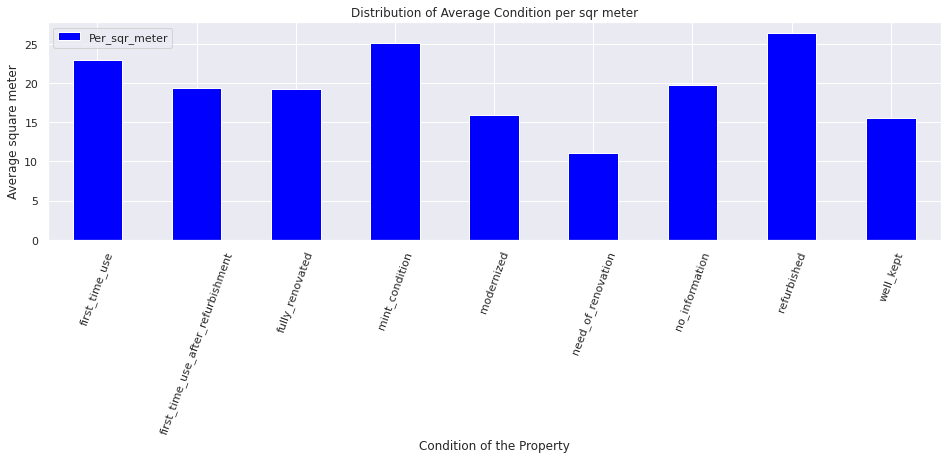

In [105]:
con_sqrmet = rentals.groupby("Condition")[["Per_sqr_meter"]].mean()
con_sqrmet.plot(kind='bar', title='Distribution of Average Condition per sqr meter',color= 'blue' , figsize=(16,4), rot=70);
plt.xlabel('Condition of the Property');
plt.ylabel('Average square meter');

# **Plot**
Plotting with pandas. Need some help?
- https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html

---  
Exercise
1. Explore the distribution of the rent
2. What is the relationship between the construction year and the rent?


## **Plot the distribution of the rent**

In [72]:
fig = go.Figure()
fig.add_trace(go.Scatter(y=rentals['Rent'],
                    mode='lines',
                    name='lines'))
fig.show()

## **Plot the relationship between the construction year and the rent?**

In [73]:

Yc_rnt=go.Scatter(
                    x = rentals['Year_Construction'],
                    y = rentals['Rent'],
                    mode = "markers",
                    name = "Year of Construction",
                    marker = dict(color = 'rgba(255, 128, 2, 0.8)'),
                    )

layout = dict(title = 'Relationship between the Year of Construction and the rent',
              xaxis= dict(title= 'Rent',ticklen= 5,zeroline= False),
              yaxis= dict(title= 'Year of Construction',ticklen= 5,zeroline= False)
             )
fig = dict(data = Yc_rnt, layout = layout)
iplot(fig)

## **Plot the relationship between the Space and the rent?**

In [74]:

Sp_rnt=go.Scatter(
                    x = rentals['Space'],
                    y = rentals['Rent'],
                    mode = "markers",
                    name = "Space",
                    marker = dict(color = 'rgba(0, 255, 200, 0.8)'),
                    )

layout = dict(title = 'Relationship between the Space and the rent',
              xaxis= dict(title= 'Rent',ticklen= 5,zeroline= False),
              yaxis= dict(title= 'Space',ticklen= 5,zeroline= False)
             )
fig = dict(data = Sp_rnt, layout = layout)
iplot(fig)

## **Plot the relationship between the Rooms and the rent?**

In [75]:

Rm_rnt=go.Scatter(
                    x = rentals['Rooms'],
                    y = rentals['Rent'],
                    mode = "markers",
                    name = "2014",
                    marker = dict(color = 'rgba(0, 0, 0, 0.8)'),
                    )

layout = dict(title = 'Relationship between the number of rooms and the rent',
              xaxis= dict(title= 'Rent',ticklen= 5,zeroline= False),
              yaxis= dict(title= 'Number of Rooms',ticklen= 5,zeroline= False)
             )
fig = dict(data = Rm_rnt, layout = layout)
iplot(fig)

## **Plot the relationship between the condition and the rent?**

In [76]:
data = {
  'x': rentals['Condition'],
  'name': 'Condition',
  'type': 'bar'
};

layout = {
  'xaxis': {'title': 'Regions'},
    'yaxis': {'title': 'Count of Condition'},
  'barmode': 'relative',
  'title': 'Total count of Condition'
};
fig = go.Figure(data = data, layout = layout)
iplot(fig)

## **Plot the Total count of regions?**

In [97]:
data = {
  'x': rentals['Region'],
  'name': 'Region',
  'type': 'bar'
};

layout = {
  'xaxis': {'title': 'Regions'},
    'yaxis': {'title': 'Count of regions'},
  'barmode': 'relative',
  'title': 'Total count of regions'
};
fig = go.Figure(data = data, layout = layout)
iplot(fig)

#**Let's recommend a good flat!**
My friend Josy is looking for a flat. She is still a student and cannot afford an expensive flat. Are there flats with a rent less than 500€ and more than 25 sqm (Space). She would like to move to Kreuzberg, Wedding, Prenzlauer Berg or Mitte. Any flats available for her? Is there a flat with two rooms and these constraints?

In [78]:
rentals[(rentals['Rent']< 500) & (rentals['Space'] > 25) & 
        ((rentals['Region'] == "Kreuzberg") | (rentals['Region'] == "Wedding")| 
         (rentals['Region'] == "Prenzlauer Berg")| (rentals['Region'] == "Mitte")) &  
        (rentals['Rooms'] == 2)]

,URL,Region,Condition,Rooms,Rent,Year_Construction,Space,Per_sqr_meter
97,https://www.immobilienscout24.de/expose/116697084,Wedding,no_information,2.0,383.46,1890,48.23,7.950653



Did you find any suitable flats? Send me the url via Slack!

# **My recommendations:**
Hi Josy,
So i filtered your request based on your most important criteria (Rent, Space, Region, No. of rooms) and I can recommend a 48.23m2, two bedroom apartment in Wedding at a rental cost of 383.46 Euros monthly. Here is the URL for the Ad; https://www.immobilienscout24.de/expose/116697084

# **ML Predictions**

## **Predicting space and number of rooms on rental price**

In [79]:
rentals.head()

,URL,Region,Condition,Rooms,Rent,Year_Construction,Space,Per_sqr_meter
0,https://www.immobilienscout24.de/expose/116051687,Mitte,first_time_use,4.0,2659.00,2019,117.20,22.687713
1,https://www.immobilienscout24.de/expose/115338103,Kreuzberg,first_time_use,1.0,1200.00,2020,29.33,40.913740
2,https://www.immobilienscout24.de/expose/116458710,Köpenick,well_kept,2.0,979.00,1997,83.61,11.709126
3,https://www.immobilienscout24.de/expose/116573177,Wilmersdorf,well_kept,4.0,1830.22,1900,171.18,10.691786
4,https://www.immobilienscout24.de/expose/115925878,Kreuzberg,first_time_use,2.0,2272.00,2020,88.27,25.739209


In [80]:
predictors = ['Rooms','Space', 'Per_sqr_meter']

X= rentals[predictors]

Y= rentals['Rent']

In [81]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2,random_state=1) 

In [82]:
rentals['Condition'].unique()

array(['first_time_use', 'well_kept', 'mint_condition', 'no_information',
       'fully_renovated', 'first_time_use_after_refurbishment',
       'refurbished', 'modernized', 'need_of_renovation'], dtype=object)

In [83]:
X_train

,Rooms,Space,Per_sqr_meter
567,2.0,52.48,22.701029
576,2.0,66.00,16.590909
346,1.0,26.90,38.661710
257,4.0,118.37,19.008195
13,2.0,186.00,34.677419
...,...,...,...
645,2.0,50.18,35.001196
715,1.0,30.98,29.018722
72,2.5,125.00,20.000000
235,3.0,105.00,24.571429


In [84]:
len(X_train)

611

In [85]:
clf= LinearRegression()

In [86]:
clf.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [87]:
clf.predict(X_test)

array([ 3266.74897006,  4784.52466508,  3365.83404765,  1972.15768722,
        1672.63538751,   832.03936649,  2661.52596921,   859.09492485,
        1858.64878337,  4273.16196364,  1712.68933192,  1749.40910675,
        1457.13105479,  1285.31460892,  3299.43176619,  1093.53310502,
        2041.9753898 ,  1428.56202301,  1051.43477297,  2150.50348687,
        1902.74129026,   771.16816585,  2172.55802334,   798.46999145,
        1712.53732818,  1719.84686766,  2022.77535374,  1438.20399571,
        1648.82589053, 10046.14401271,  4568.43456519,  2838.22688297,
        1979.21438018,  1137.48331497,   710.87127901,  1705.08319851,
        1374.03248008,  1853.95342491,  2002.80469544,  2136.31801232,
        1058.12949326,  3384.09971303,   227.15496094,   382.04898768,
        1980.51727661,  1642.37067947,   506.58892197,  1728.41999104,
         964.40998323,  2527.56440807,  1204.80648405,  1825.27452237,
        4313.11772675,   979.01836371,   492.26771088,  2636.68447703,
      

In [88]:
Y_test

457    3090.40
148    3739.46
741    3925.00
526    2105.40
400    1700.00
        ...   
491    1600.00
643    2175.00
506    2295.00
331    1570.00
439    2484.62
Name: Rent, Length: 153, dtype: float64

In [89]:
clf.score(X_test,Y_test)

0.897634627151128

## **Predicting Year of Construction on rental price**

In [90]:
rentals.head()

,URL,Region,Condition,Rooms,Rent,Year_Construction,Space,Per_sqr_meter
0,https://www.immobilienscout24.de/expose/116051687,Mitte,first_time_use,4.0,2659.00,2019,117.20,22.687713
1,https://www.immobilienscout24.de/expose/115338103,Kreuzberg,first_time_use,1.0,1200.00,2020,29.33,40.913740
2,https://www.immobilienscout24.de/expose/116458710,Köpenick,well_kept,2.0,979.00,1997,83.61,11.709126
3,https://www.immobilienscout24.de/expose/116573177,Wilmersdorf,well_kept,4.0,1830.22,1900,171.18,10.691786
4,https://www.immobilienscout24.de/expose/115925878,Kreuzberg,first_time_use,2.0,2272.00,2020,88.27,25.739209


In [91]:
dummy = pd.get_dummies(rentals['Region'])
rentals = pd.concat([rentals,dummy],axis=1)
predictors = ['Rooms','Space', 'Per_sqr_meter','Mitte', 'Kreuzberg', 'Köpenick', 'Wilmersdorf', 'Charlottenburg',
       'Friedrichsfelde', 'Tiergarten', 'Prenzlauer', 'Wedding',
       'Neukölln']

X= rentals[predictors]

Y= rentals['Rent']

In [92]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2,random_state=1) 

In [93]:
clf= LinearRegression()

In [94]:
clf.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [95]:
clf.predict(X_test)

array([ 3356.57730988,  4711.95882754,  3427.51934078,  1932.85637626,
        1590.03368491,   940.99911628,  2672.14222033,   871.80124556,
        1941.64088365,  4176.67841322,  1737.04448511,  1770.5715767 ,
        1427.47596868,  1300.08721397,  3331.45450614,  1141.92399813,
        2117.86929248,  1535.24328836,  1082.78906632,  2137.00896512,
        1874.58912007,   721.97318509,  2180.88573278,   761.67246598,
        1701.11442649,  1753.23156121,  2042.18134729,  1544.43537608,
        1635.02840788, 10063.33755351,  4638.66942179,  2911.15050598,
        1950.17746833,  1175.06277558,   727.56629312,  1727.61668642,
        1411.17388339,  1866.1668872 ,  2025.80135623,  2042.32378929,
         987.58713207,  3478.40909439,   267.47765242,   451.119147  ,
        1986.99222439,  1655.97120013,   574.28511372,  1763.44366885,
         993.27640297,  2494.04393843,  1186.28494964,  1933.07820333,
        4370.55247818,   823.59891738,   521.1283869 ,  2627.47704201,
      

In [96]:
clf.score(X_test,Y_test)

0.9004119399625929

#**Visualizations**